**Convolutional Neural Network (CNN) for Image Classification**

Packages for dealing with images:
1. [OpenCV](https://pypi.org/project/opencv-python/)
2. [Matplotlib](https://matplotlib.org/)
3. [Pillow](https://pillow.readthedocs.io/en/stable/)
3. [scikit-image](https://scikit-image.org/)
4. [Tensorflow](https://www.tensorflow.org/)

In [1]:
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten

## Load images

In [ ]:
def get_filenames(subfolder):
    imagefiles = [os.path.join(subfolder, filename) for filename in os.listdir(subfolder) if os.path.isdir(subfolder)] ## wo ist der Fehler?
    #imagefiles = [f for f in glob.glob(filepath+'*.jpg')]
    return imagefiles    
"""
def read_image_names(filepath):
    #imagefiles = [file for _, _, file in os.walk(filepath)]
    imagefiles = []
    categories = []
    for dirpath, dirnames, filenames in os.walk(filepath):
        for filename in filenames:
            full_path = os.path.join(dirpath, filename)  # Kompletter Pfad der Datei
            imagefiles.append(full_path)
        for dirname in dirnames: 
            categories.append(dirname)
    print(imagefiles)
    return imagefiles, categories"""

def get_filenames_labels(folder):
    #Tool-Tip: immer machen, best practice! Für Notebook machen?! Formatierung so machen, tiptop
    ''' Detects categories, filenames and labels of images
        Arguments
        ---------
        folder: string
            The folder where the images reside in subfolders. Subfolders correspond to the categories.

        Returns
        -------
        categories : list
            A list with all categories
        filenames: list
            A list of list of filenames of the images
        labels: list
            A list of list of the categories corresponding to filenames
    '''
    categories = [f.name for f in os.scandir(folder) if f.is_dir()]
    filenames = []
    labels = []
    for category in categories: 
        subfolder = os.path.join(folder, category)
        fnames = get_filenames(subfolder)
        filenames.append(fnames)
        labels.append([category] * len(fnames))

    return categories, flatten_lst(filenames), flatten_lst(labels)

# Label list
def flatten_lst(lst):
    return [item for items in lst for item in items] # items = innere Liste in der äußeren Liste item = Element in innerer Liste


def read_images(filenames, height=None, width=None):
    images = [Image.open(filename) for filename in filenames]
    if (not height is None) and (not width is None):
        images = [img.resize((width, height)) for img in images]
    return images

def images_to_array(images):
    return np.asarray([np.asarray(img) for img in images])

# Get file names
folder = './Fotos'
#image_names, categories = read_image_names(filepath)
categories, image_names, labels = get_filenames_labels(folder)
print(image_names)
print(labels)
print(categories)
# Load images
input_shape = {
    "height": 200,
    "width": 200,
    "channels": 3
}
images = read_images(image_names, height=input_shape["height"], width=input_shape["width"])
# Convert images to array
aimages = images_to_array(images)
print(f'Shape of images array: {aimages.shape}')
# Plot images array
#display(Image.fromarray(aimages[11]))
fig = plt.figure(figsize=(8, 8))
rows, columns = 3, 5
for i in range(aimages.shape[0]):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(aimages[i, ...])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './Machine-and-Deep-Learning/Fotos'

In [7]:
#Data Augmentation

a = np.arange(1,13).reshape(4, 3)
a = np.flipud(a)
print(a)
#concatenate für augmentierte und nicht-augmentierte Bilder
flipped_images = []
rotated_images = []
flip_and_rotated_images = []

def augmentImages():
    for image in images:
        flipped_images.append(np.flipud(image))
        rotated_images.append(np.rot90(image))
    combined_images = flipped_images + rotated_images
    print(len(combined_images))
    return combined_images

def showImages(image_list):
    for image in image_list:
        plt.imshow(image)
        plt.show()
combined_images = images_to_array(augmentImages())
#showImages(combined_images)



[[10 11 12]
 [ 7  8  9]
 [ 4  5  6]
 [ 1  2  3]]
30


## Create Labels

In [8]:
# Label list
def flatten_lst(lst):
    return [item for items in lst for item in items] # items = innere Liste in der äußeren Liste item = Element in innerer Liste

#categories = ['Eichhörnchen', 'Maus', 'Meerschweinchen']
#labels = flatten_lst([[label] * 5 for label in categories])
print(labels)
# One-hot encoding of the labels
encoder = OneHotEncoder(categories=[categories], sparse_output=False)
y = encoder.fit_transform(np.array(labels).reshape(-1,1))
y

['Meerschweinchen', 'Meerschweinchen', 'Meerschweinchen', 'Meerschweinchen', 'Meerschweinchen', 'Eichhörnchen', 'Eichhörnchen', 'Eichhörnchen', 'Eichhörnchen', 'Eichhörnchen', 'Maus', 'Maus', 'Maus', 'Maus', 'Maus']


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

## K-Fold Cross Validation

In [ ]:
#### Array mit Datensätze in k-Folds einteilen ####
# erst später

#### Array je nach Anzahl der Epochen trainieren ####
epoch = 15


## Build model

In [48]:
# Hyperparameters
epochs = 15
batch_size = 32

# CNN model
inputs = Input(shape=(input_shape.values()))
hidden = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(inputs)
hidden = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(hidden)
hidden = MaxPooling2D(pool_size=(2,2))(hidden)
hidden = Dropout(rate=0.25)(hidden)
hidden = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu')(hidden)
hidden = MaxPooling2D(pool_size=(2,2))(hidden)
hidden = Dropout(rate=0.25)(hidden)
hidden = Flatten()(hidden)
hidden = Dense(units=256, activation='relu')(hidden)
hidden = Dropout(rate=0.25)(hidden)
output = Dense(units=y.shape[-1], activation='softmax')(hidden)
cnn = Model(inputs=inputs, outputs=output, name='CNN_CBP_Class')

# Configuration of the training process
cnn.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Fit model
history = cnn.fit(x=aimages, y=y, epochs=epochs, batch_size=1)

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 447ms/step - accuracy: 0.4302 - loss: 3509.7495
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 447ms/step - accuracy: 0.4820 - loss: 43.1742
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 414ms/step - accuracy: 0.7548 - loss: 1.2297
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 415ms/step - accuracy: 0.7914 - loss: 0.5304
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 428ms/step - accuracy: 0.9525 - loss: 0.5095
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 445ms/step - accuracy: 0.6433 - loss: 38.9040
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 426ms/step - accuracy: 0.8837 - loss: 0.2943
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 425ms/step - accuracy: 0.8342 - loss: 0.5202
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 458ms/step - accuracy: 0.8509 - loss: 0.2535
Epoch 10/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 436ms/step - accuracy: 0.7515 - loss: 2.6305
Epoch 11/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 438ms/step - accuracy: 0.9644 - loss: 0.6098
Epoch 12/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 419ms

## Plot model learning curve

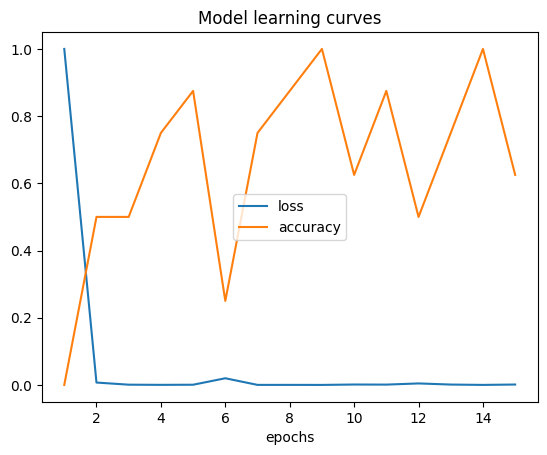

In [49]:
def minmax(a):
    a = np.asarray(a)
    a = (a - a.min()) / (a.max() - a.min())
    return a

plt.plot(range(1, epochs+1), minmax(history.history['loss']))
plt.plot(range(1, epochs+1), minmax(history.history['accuracy']))
plt.title('Model learning curves')
plt.xlabel('epochs')
plt.gca().legend(('loss', 'accuracy'))
plt.show()

## Predictions

In [50]:
# Metric functions
def accuracy(actuals, preds):
    actuals, preds = np.asarray(actuals), np.asarray(preds)
    return np.mean(np.ravel(actuals) == np.ravel(preds))

In [51]:
yhat = cnn.predict(aimages)
yhat = np.argmax(yhat, axis=1)
yhat = np.asarray(categories)[yhat]

print(f'Accuracy: {round(accuracy(labels, yhat) * 100, 2)}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
Accuracy: 100.0%


## Transfer Learning

Transfer learning is the reuse of an pre-trained neural network for similar, related tasks. An overview of pre-trained convolutional neural networks in Tensorflow can be found on https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [10]:
from tensorflow.keras.applications import VGG16

# Images should be in specified input shape for pre-trained model
pt_input_shape = {'height': 224, 'width': 224, 'channels': 3}
pt_images = images_to_array(read_images(image_names, height=pt_input_shape['height'], width=pt_input_shape['width']))

# Load pre-configured and pre-trained CNN without top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=tuple(pt_input_shape.values()))
# Mark loaded layers as not trainable (freeze layers)
for layer in base_model.layers:
    layer.trainable = False

# Place new top layer on base model
output = Flatten()(base_model.layers[-1].output)
output = Dense(units=1024, activation='relu')(output)
output = Dense(units=y.shape[-1], activation='softmax')(output)

# Define the entire new model
pt_cnn = Model(inputs=base_model.inputs, outputs=output)

# Train the new model
epochs = 60
batch_size = 32
pt_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
pt_history = pt_cnn.fit(x=pt_images, y=y, epochs=epochs, batch_size=batch_size)

# Predict on the model
yhat = pt_cnn.predict(pt_images)
yhat = np.argmax(yhat, axis=1)
yhat = np.asarray(categories)[yhat]
print(f'Accuracy: {round(accuracy(labels, yhat) * 100, 2)}%')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2667 - loss: 19.4182
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6667 - loss: 214.5664
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7333 - loss: 74.7487
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 11/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 12/60
1/1 ━━━━

In [48]:
# Alternative way
pt_cnn = tf.keras.Sequential()

base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=tuple(pt_input_shape.values()), classes=y.shape[-1])
for layer in base_model.layers:
    layer.trainable = False

pt_cnn.add(base_model)
pt_cnn.add(Flatten())
pt_cnn.add(Dense(units = 1024, activation='relu'))
pt_cnn.add(Dense(units = y.shape[-1], activation='softmax'))

epochs = 60
batch_size = 32
pt_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
pt_history = pt_cnn.fit(x=pt_images, y=y, epochs=epochs, batch_size=batch_size)

# Predict on the model
yhat = pt_cnn.predict(pt_images)
yhat = np.argmax(yhat, axis=1)
yhat = np.asarray(categories)[yhat]
print(f'Accuracy: {round(accuracy(labels, yhat) * 100, 2)}%')

Epoch 1/60
1/1 [==============================] - 6s 6s/step - loss: 2.2908 - accuracy: 0.3333
Epoch 2/60
1/1 [==============================] - 1s 1s/step - loss: 14.0079 - accuracy: 0.6667
Epoch 3/60
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/60
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/60
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/60
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/60
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/60
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/60
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/60
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 11/60
1/1 

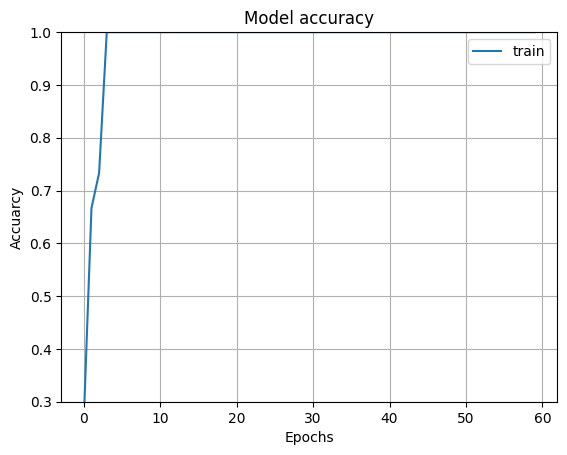

In [11]:
plt.plot(pt_history.history['accuracy'])
plt.axis(ymin=0.3, ymax = 1)
plt.grid()
plt.title('Model accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('Epochs')
plt.legend(['train'])
plt.show()

In [12]:
# Other metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(labels, yhat)
pre = precision_score(labels, yhat, average=None)
rec = recall_score(labels, yhat, average=None)
f1 = f1_score(labels, yhat, average=None)
print(f'Accuracy: {acc}, Precision: {pre}, Recall: {rec}, F1-Score: {f1}')

Accuracy: 1.0, Precision: [1. 1. 1.], Recall: [1. 1. 1.], F1-Score: [1. 1. 1.]
